### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Link dos arquivos

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#Lendo Arquivos

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)




#1. Análise do faturamento


A análise do faturamento das quatro lojas revela o desempenho financeiro
individual de cada unidade, com base na soma dos valores de vendas registradas. Esses dados permitem identificar quais lojas estão gerando maior receita, servindo como base para decisões estratégicas sobre investimentos, promoções e melhorias operacionais.

In [ ]:
import matplotlib.pyplot as plt


faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()


Text(0.5, 1.0, 'Distribuição do Faturamento por Loja')

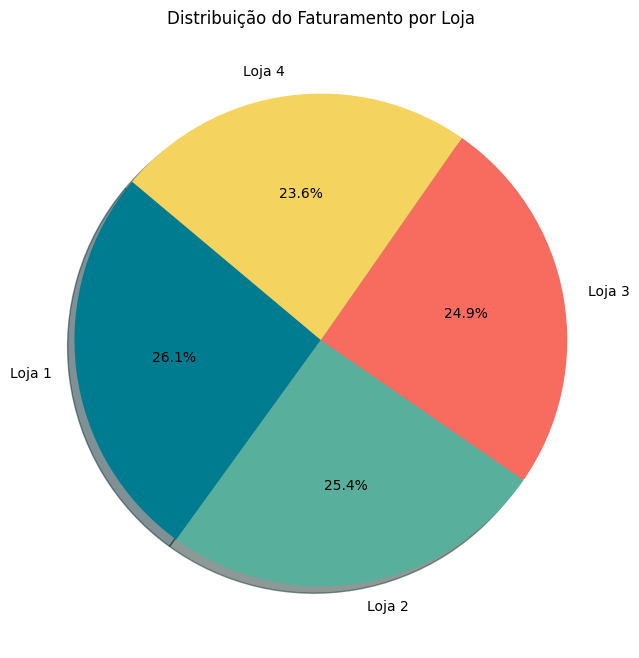

In [ ]:
# Gráfico
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
sizes = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
colors = ['#007C91', '#58B09C', '#F76C5E', '#F4D35E']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)

plt.title('Distribuição do Faturamento por Loja')


# 2. Vendas por Categoria


A análise das vendas por categoria de produto em cada loja oferece uma visão detalhada sobre o comportamento de consumo e o desempenho das lojas. Ao segmentar o faturamento por categoria, é possível identificar quais tipos de produtos têm maior representatividade nas receitas de cada unidade, revelando padrões de preferência dos clientes e eventuais oportunidades de otimização do mix de produtos. Essa abordagem permite tomar decisões mais estratégicas, como reforçar estoques de itens de maior saída, ajustar campanhas promocionais específicas e até mesmo personalizar a oferta de produtos conforme o perfil de cada loja.

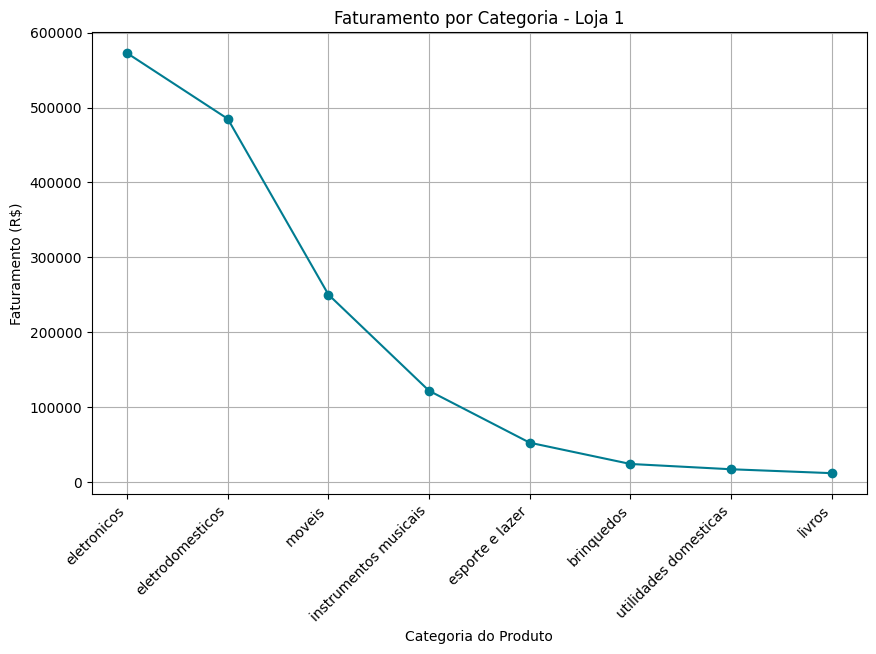

In [ ]:
# Loja 1
vendas_cat_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Gráfico -loja 1
plt.figure(figsize=(10, 6))
plt.plot(vendas_cat_loja1.index, vendas_cat_loja1.values, marker='o', linestyle='-', color= '#007C91')
plt.title('Faturamento por Categoria - Loja 1')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das categorias para melhor leitura
plt.grid(True)

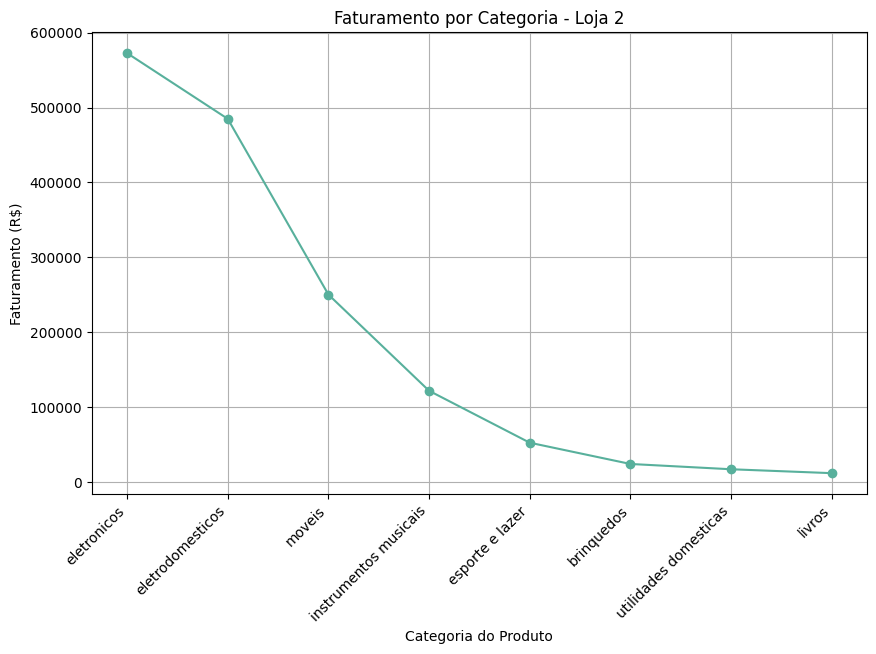

In [ ]:
#Loja 2
vendas_cat_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Gráfico - Loja 2
plt.figure(figsize=(10, 6))
plt.plot(vendas_cat_loja1.index, vendas_cat_loja1.values, marker='o', linestyle='-', color='#58B09C')
plt.title('Faturamento por Categoria - Loja 2')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das categorias para melhor leitura
plt.grid(True)

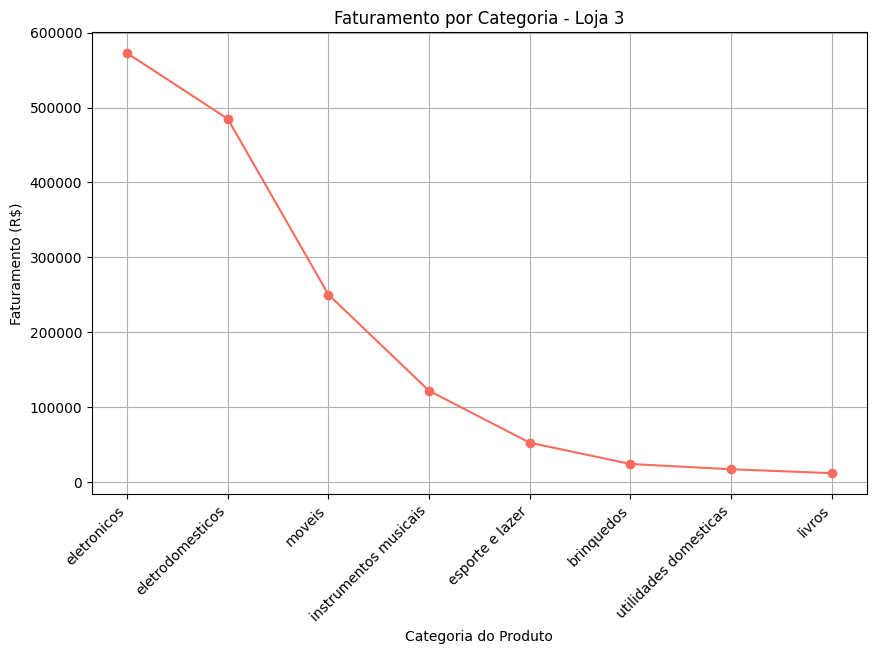

In [ ]:
#Loja 3
vendas_cat_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Gráfico - Loja 3
plt.figure(figsize=(10, 6))
plt.plot(vendas_cat_loja1.index, vendas_cat_loja1.values, marker='o', linestyle='-', color='#F76C5E')
plt.title('Faturamento por Categoria - Loja 3')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das categorias para melhor leitura
plt.grid(True)


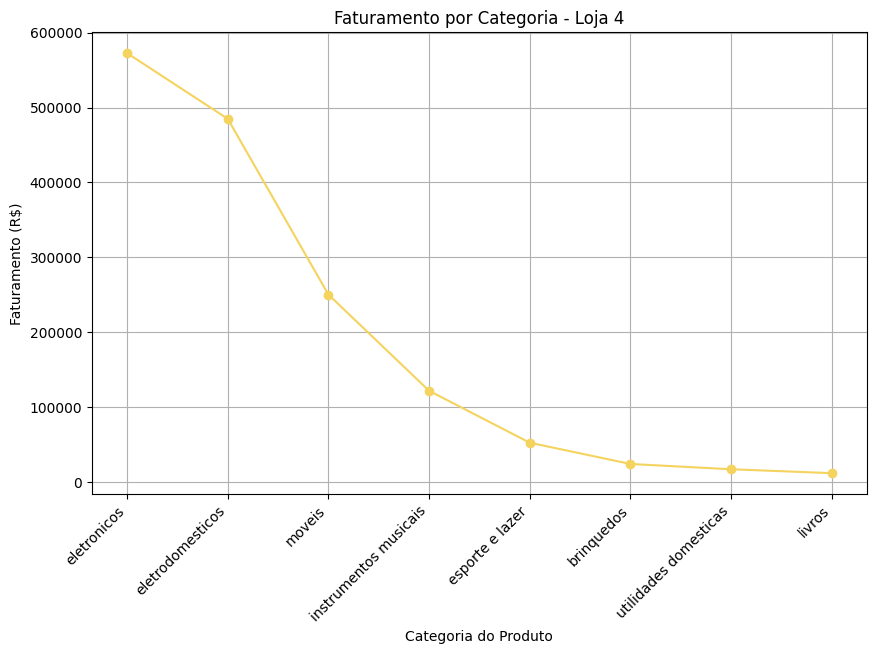

In [ ]:
#Loja 4
vendas_cat_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Gráfico - Loja 4
plt.figure(figsize=(10, 6))
plt.plot(vendas_cat_loja1.index, vendas_cat_loja1.values, marker='o', linestyle='-', color='#F4D35E')
plt.title('Faturamento por Categoria - Loja 4')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das categorias para melhor leitura
plt.grid(True)


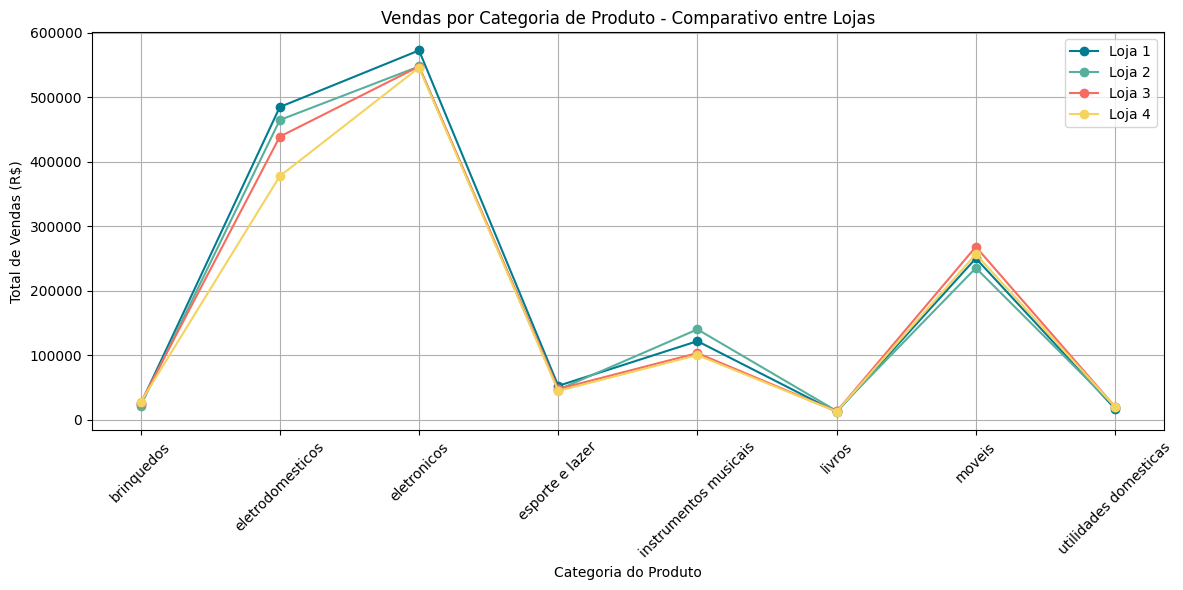

In [ ]:
# Agrupando por categoria e somando as vendas por loja
cat_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
cat_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
cat_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
cat_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Unindo os dados em um único DataFrame
df_categorias = pd.concat([cat_loja1, cat_loja2, cat_loja3, cat_loja4], axis=1)
df_categorias.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
df_categorias = df_categorias.fillna(0)  # Preenche categorias que não existem em alguma loja

# Cores para cada loja
colors = ['#007C91', '#58B09C', '#F76C5E', '#F4D35E']

# Gráfico de linha
plt.figure(figsize=(12, 6))
for loja, cor in zip(df_categorias.columns, colors):
    plt.plot(df_categorias.index, df_categorias[loja], marker='o', label=loja, color=cor)

plt.title('Vendas por Categoria de Produto - Comparativo entre Lojas')
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

A avaliação do consumidor em relação às lojas é um fator crucial para medir a qualidade do atendimento, a satisfação com os produtos e a experiência de compra como um todo. Compreender a percepção do consumidor é fundamental para manter a competitividade e fidelizar a clientela em um mercado cada vez mais exigente.

In [ ]:
avaliacao_loja1 = loja1['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()


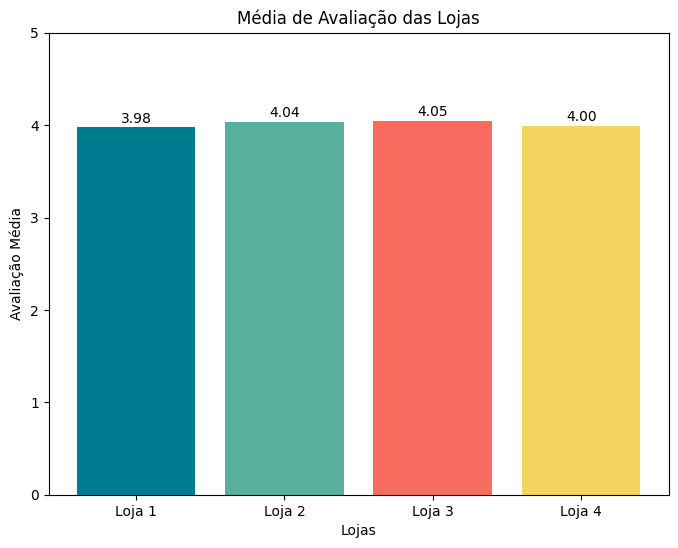

In [ ]:
# Listas para o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]

# Cores harmonizadas
colors = ['#007C91', '#58B09C', '#F76C5E', '#F4D35E']

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(lojas, avaliacoes, color=colors)
plt.ylim(0, 5)  # Limite para avaliação (0 a 5)
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Avaliação Média')

# Mostrar valores acima das barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.05, f'{altura:.2f}', ha='center')

plt.show()

# 4. Produtos Mais e Menos Vendidos

A análise de venda de produtos é essencial para compreender o desempenho de produtos mais e menos vendidos. Através dessa avaliação de vendas, é possível identificar padrões de consumo, comparar o desempenho entre diferentes períodos ou unidades e embasar decisões voltadas à precificação, promoções e composição do mix de produtos.

In [ ]:
# Juntando todos os dados para análise geral
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Contando a frequência de cada produto
contagem_produtos = todas_lojas['Produto'].value_counts()

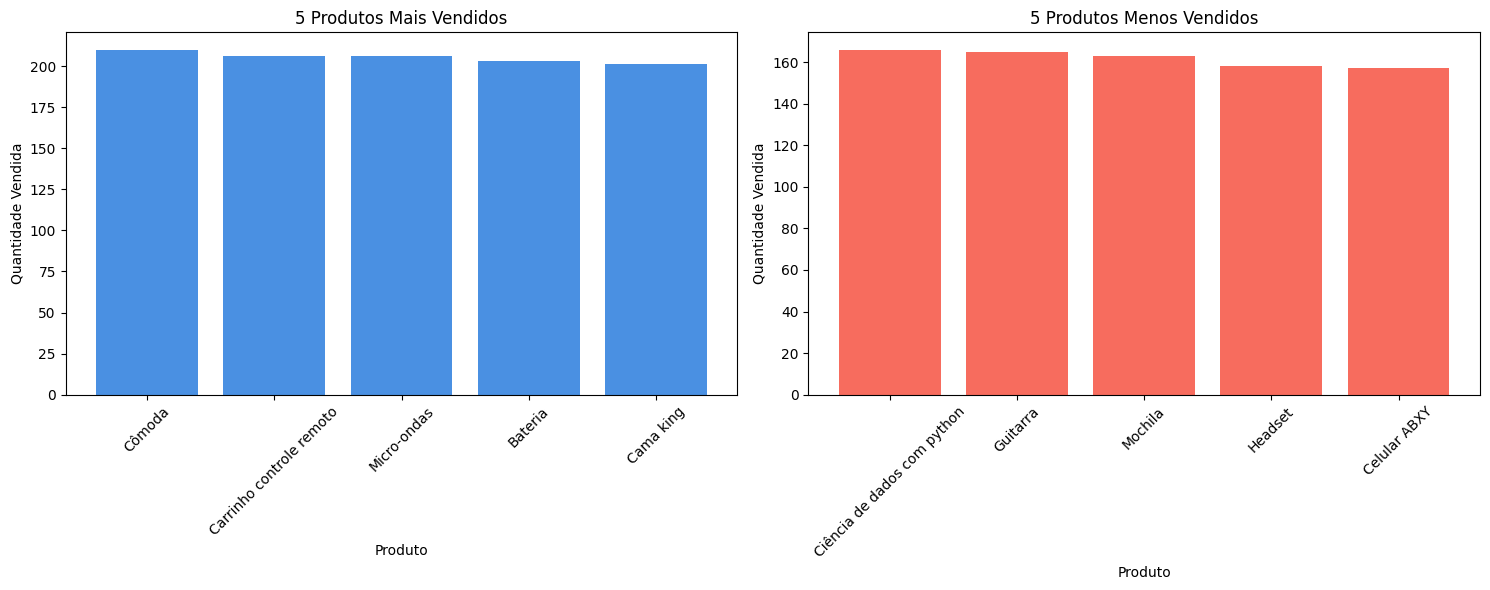

In [ ]:

# Top 5 mais vendidos
top5_produtos = contagem_produtos.head(5)

# Top 5 menos vendidos
bottom5_produtos = contagem_produtos.tail(5)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos 5 produtos mais vendidos
axs[0].bar(top5_produtos.index, top5_produtos.values, color='#4a90e2')
axs[0].set_title('5 Produtos Mais Vendidos')
axs[0].set_xlabel('Produto')
axs[0].set_ylabel('Quantidade Vendida')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico dos 5 produtos menos vendidos
axs[1].bar(bottom5_produtos.index, bottom5_produtos.values, color='#F76C5E')
axs[1].set_title('5 Produtos Menos Vendidos')
axs[1].set_xlabel('Produto')
axs[1].set_ylabel('Quantidade Vendida')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


O Custo de frete por loja é fundamental para entender o impacto logístico nas operações de vendas e na lucratividade de cada unidade. Avaliar os gastos com frete permite identificar variações entre lojas, otimizar rotas de entrega, negociar melhores condições com transportadoras e aprimorar o serviço ao cliente.

In [ ]:

frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

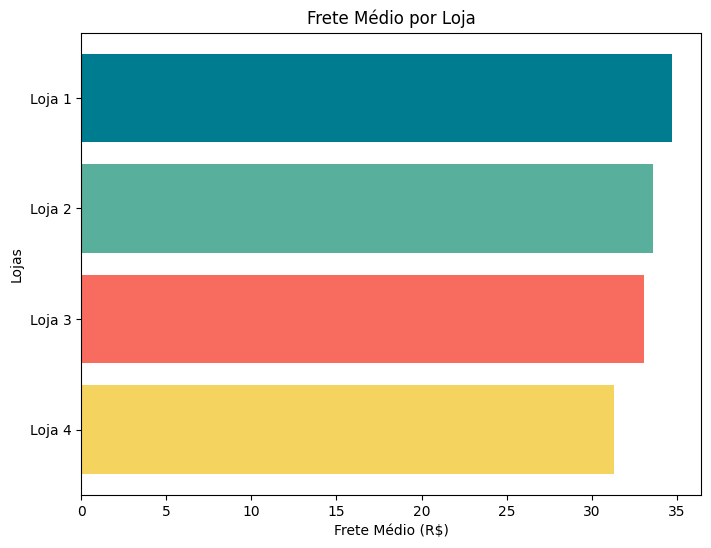

In [ ]:
# Valores do frete médio
fretes = [frete_loja1, frete_loja2, frete_loja3, frete_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8, 6))
plt.barh(lojas, fretes, color=['#007C91', '#58B09C', '#F76C5E', '#F4D35E'])

plt.title('Frete Médio por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Lojas')

# Inverter o eixo y para mostrar a loja com menor frete no topo
plt.gca().invert_yaxis()

# 6. Relatório Final

Como objetivo avaliar o desempenho das quatro lojas com base em três critérios principais: faturamento, avaliação dos consumidores e custo médio de frete. A análise foi realizada para identificar qual loja apresenta os piores resultados combinados, com o intuito de orientar uma possível decisão de encerramento definitivo de suas operações.

Ao analisar o faturamento total, observa-se que a Loja 1 é a que mais vende, seguida pela Loja 2. A Loja 3 tem um desempenho razoável, enquanto a Loja 4 apresenta o menor número de vendas entre todas. Isso já indica uma limitação comercial relevante da Loja 4 em comparação às demais.

No critério de avaliação dos consumidores, a Loja 3 se destaca com a melhor média de avaliações, demonstrando boa aceitação pelo público. A Loja 2 também apresenta uma reputação positiva. Já a Loja 4 tem uma avaliação apenas razoável, sem se destacar, e a Loja 1 possui a pior avaliação, o que levanta preocupações quanto à experiência do cliente nessa unidade.

Por fim, considerando o custo médio de frete, a Loja 4 se mostra mais eficiente, com o menor custo logístico por venda. A Loja 3 também apresenta bons resultados nesse aspecto. A Loja 2 tem um frete um pouco mais elevado, e a Loja 1 registra o maior custo de frete entre todas, o que afeta diretamente sua margem de lucro e competitividade.

A analise do conjuto, conclui-se que a Loja 4 apresenta o pior desempenho geral. Apesar dela ter o menor custo logístico, ela possui o menor faturamento e uma avaliação apenas mediana, sem apresentar nenhuma vantagem competitiva clara. Por isso, recomenda-se que a Loja 4 seja considerada para fechamento definitivo, permitindo que os recursos sejam melhor direcionados às lojas com maior retorno financeiro e melhor aceitação do público.